<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
<div dir=ltr>
Dorsa Ghobadi



____

# Personal Data

In [4]:
# from hyperlink.hypothesis import paths
from libarchive.ffi import backup_path
from networkx.classes import neighbors
from toolz import curry

# Set your student number
student_number = '400107383'
Name = 'masoud'
Last_Name = 'vanani'

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!

## Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue, LifoQueue, PriorityQueue
import random


# Uninformed & Informed Search

<font size=4>
Author: Dorsa Ghobadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

In This Problem, We want to investigate Maze Problem with the focus on implementing BFS,DFS and A-Star algorithm to solve it. This notebook is inspired by the [pacman](https://freepacman.org/) game. We generate a random maze and put the pacman in the top left crner and the food in the bottom right corner. The goal is to find a way from the pacman to the food using different search algorithms.



## Code

In [13]:
def generate_maze(rows, cols, wall_prob=0.3):
    np.random.seed(40)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, start, goal;

def plot_maze(maze, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray")
    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='green', s=100, label='Food')  # Food
    plt.legend()
    plt.show()

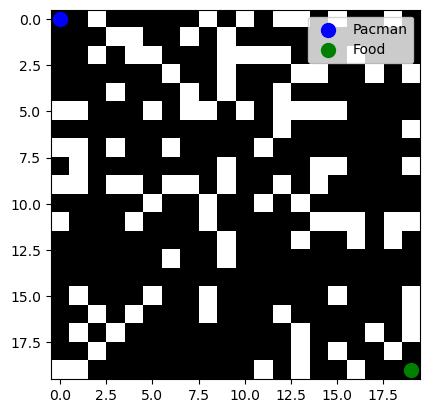

In [14]:
rows, cols = 20, 20
maze, start, goal = generate_maze(rows, cols)
plot_maze(maze, start=start, goal=goal)


In [15]:
    class SearchAlgorithm:
        def __init__(self, maze):
            self.maze = maze
            self.rows, self.cols = maze.shape
            self.visited = np.zeros_like(maze)
            self.expanded_nodes = 0

        def get_neighbors(self, pos):
            neighbors = []
            directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
            for d in directions:
                new_pos = (pos[0] + d[0], pos[1] + d[1])
                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                    neighbors.append(new_pos)
            return neighbors


In [16]:
def plot_algorithm(maze, start, goal, name, algorithm):
  path = algorithm.search(start, goal)
  result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes}
  print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}")
  plot_maze(maze, path, start, goal)



In [17]:
def reconstruct_path(backtrack_paths, start, goal):
    if not backtrack_paths or goal not in backtrack_paths:
        return None
    path = []  # A list to store nodes
    current_node = goal

    while current_node is not None:
        path.append(current_node)  # Append current node
        if current_node == start:
            break  # Stop if we reached the start
        current_node = backtrack_paths.get(current_node)  # Get the previous node

    path.reverse()  # Reverse to get the path from start to goal
    return path


class DFS(SearchAlgorithm):

    def search(self, start, goal):
        stack = [start]
        backtrack_paths = {}  # A dictionary that stores the parent of a node as the value of a key
        
        while stack:
            current_node = stack.pop()

            if current_node == goal:
                return reconstruct_path(backtrack_paths, start, goal)

            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:
                    stack.append(neighbor)
                    self.visited[x, y] = 1
                    self.expanded_nodes += 1
                    backtrack_paths[neighbor] = current_node  # Correctly update backtrack paths

        # If the goal was not found, return None
        return None



DFS: Expanded Nodes = 234


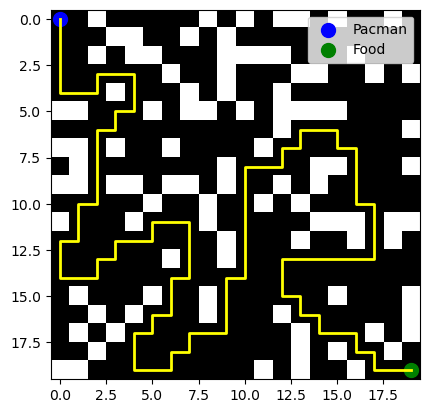

In [18]:
plot_algorithm(maze,start,goal,'DFS', DFS(maze))

In [19]:
from collections import deque

class BFS(SearchAlgorithm):

    def search(self, start, goal):
        queue = deque([start])  # Initialize the queue with the start node
        backtrack_paths = {}  # Store the parent of each node
        self.visited[start[0], start[1]] = 1  # Mark the start node as visited

        while queue:
            current_node = queue.popleft()  # Dequeue a node from the front of the queue

            if current_node == goal:
                return reconstruct_path(backtrack_paths, start, goal)

            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:  # If the neighbor hasn't been visited
                    self.visited[x, y] = 1  # Mark as visited
                    backtrack_paths[neighbor] = current_node  # Store parent
                    queue.append(neighbor)  # Enqueue the neighbor
                    self.expanded_nodes += 1  # Increment the expanded nodes counter

        # If the goal was not found, return None
        return None




BFS: Expanded Nodes = 279


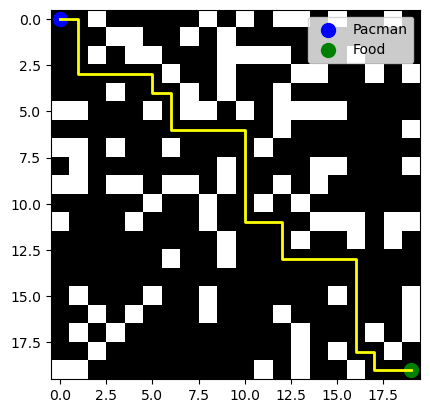

In [20]:
plot_algorithm(maze,start,goal,'BFS', BFS(maze))

Question:

So far, we have explored three uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).

In [22]:
class AStar(SearchAlgorithm):
    def heuristic(self, pos, goal):
        #TODO: implement A* heuristic
        deltaX = goal[0] - pos[0]
        deltaY = goal[1] - pos[1]
        manhattan_distance = deltaX + deltaY
        return manhattan_distance

    def g(self, backtrack_paths, start, pos):
        g = 0
        if not backtrack_paths or pos not in backtrack_paths:
            return 0 # ???
        current_node = pos

        while current_node is not None:
            g += 1 # update g(n)
            if current_node == start:
                break  # Stop if we reached the start
            current_node = backtrack_paths.get(current_node)  # Get the previous node
            
        return g

    def f(self, start, goal, pos, backtrack_paths):
        h = self.heuristic(pos, goal)
        g = self.g(backtrack_paths, start, pos)
        return h + g

    def pop(self, fringe, start, goal, backtrack_paths):
        if backtrack_paths is None:
            return None

        smallest_f = 100000000
        smalles_index = 0
        i = 0
        while i < len(fringe):
            pos = fringe[i]
            f = self.f(start, goal, pos, backtrack_paths)
            if f < smallest_f:
                smallest_f = f
                smallest_index = i
            i += 1
        node = fringe[smallest_index]
        fringe.pop(smallest_index)
        return node, fringe
                
        

    def search(self, start, goal):
        #TODO: implement A* search
        fringe = [start]
        backtrack_paths = {}  # A dictionary that stores the parent of a node as the value of a key

        while fringe:
            current_node, fringe = self.pop(fringe, start, goal, backtrack_paths)
            
            if current_node == goal:
                return reconstruct_path(backtrack_paths, start, goal)

            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:
                    fringe.append(neighbor)
                    self.visited[x, y] = 1
                    self.expanded_nodes += 1
                    backtrack_paths[neighbor] = current_node  # Correctly update backtrack paths
        
        #return the path which is a list of tuples
        return None




A*: Expanded Nodes = 194


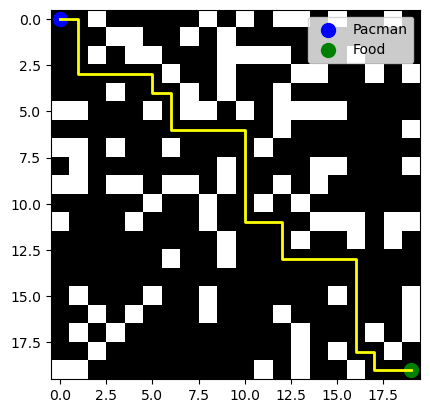

In [24]:
plot_algorithm(maze,start,goal,'A*', AStar(maze))

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uniformed search in the context of the Maze problem.

Now we want to explore a situation where each cell of the maze has an entrance cost, which means in order to enter that cell we must pay a fixed price. you should implement the above search algorithms with the least payed cost.

In [27]:
def generate_maze_with_costs(rows, cols, wall_prob=0.3):
    np.random.seed(137)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    costs = np.random.randint(1, 11, size=(rows, cols))
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, costs, start, goal

def plot_maze_with_costs(maze, costs, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray", vmin=0, vmax=1)

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                cl = 'red' if costs[i,j] > 6 else ('green' if costs[i,j] < 4 else 'orange')
                plt.text(j, i, str(costs[i, j]), ha='center', va='center', color=cl, fontsize=8)

    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='pink', s=100, label='Food')  # Food
    plt.legend()
    plt.show()


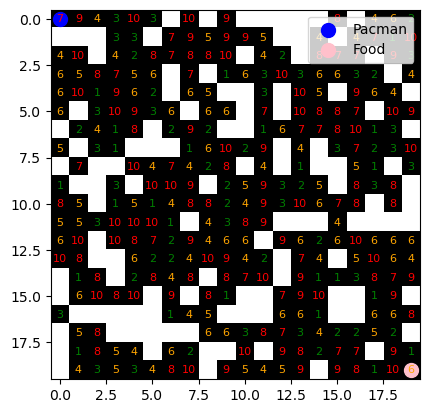

[[0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0]
 [0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1]
 [0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0]
 [1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]]


In [63]:
rows, cols = 20, 20
maze, costs, start, goal = generate_maze_with_costs(rows, cols)
plot_maze_with_costs(maze, costs, start=start, goal=goal)

In [29]:
# Search Algorithms
class SearchAlgorithmWithCosts:
    def __init__(self, maze, costs):
        self.maze = maze
        self.costs = costs
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors

    def calculate_total_cost(self, path):
        return sum(self.costs[pos] for pos in path)



In [30]:
def plot_algorithms_with_costs(maze, costs, start, goal,name,algorithm):
    path, total_cost = algorithm.search(start, goal)
    result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes, 'total_cost': total_cost}
    print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}, Total Cost = {total_cost}")
    plot_maze_with_costs(maze, costs, path, start, goal)


In [47]:
class DFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        stack = [start]
        backtrack_paths = {}  # A dictionary that stores the parent of a node as the value of a key
        
        while stack:
            current_node = stack.pop()

            if current_node == goal:
                best_path = reconstruct_path(backtrack_paths, start, goal)
                best_cost = self.calculate_total_cost(best_path)
                return best_path, best_cost


            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:
                    stack.append(neighbor)
                    self.visited[x, y] = 1
                    self.expanded_nodes += 1
                    backtrack_paths[neighbor] = current_node  # Correctly update backtrack paths

        # If the goal was not found, return None
        return None, float('inf')


DFS: Expanded Nodes = 253, Total Cost = 722


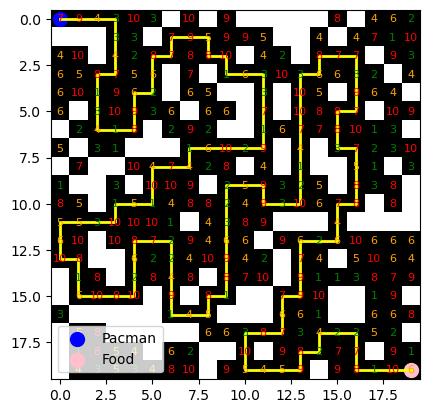

In [49]:
plot_algorithms_with_costs(maze, costs, start, goal,'DFS',DFSWithCosts(maze,costs))

In [51]:
# BFS Algorithm with Costs
class BFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        queue = deque([start])  # Initialize the queue with the start node
        backtrack_paths = {}  # Store the parent of each node
        self.visited[start[0], start[1]] = 1  # Mark the start node as visited

        while queue:
            current_node = queue.popleft()  # Dequeue a node from the front of the queue

            if current_node == goal:
                best_path = reconstruct_path(backtrack_paths, start, goal)
                best_cost = self.calculate_total_cost(best_path)
                return best_path, best_cost

            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:  # If the neighbor hasn't been visited
                    self.visited[x, y] = 1  # Mark as visited
                    backtrack_paths[neighbor] = current_node  # Store parent
                    queue.append(neighbor)  # Enqueue the neighbor
                    self.expanded_nodes += 1  # Increment the expanded nodes counter

        # If the goal was not found, return None
        return None, float('inf')

BFS: Expanded Nodes = 267, Total Cost = 232


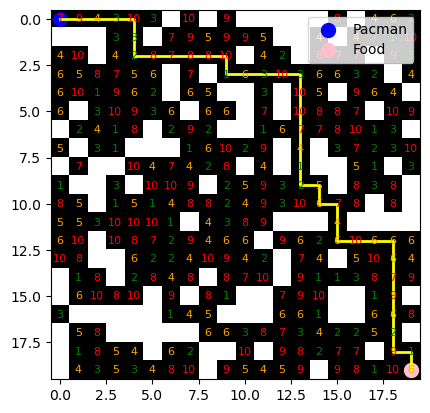

In [53]:
plot_algorithms_with_costs(maze, costs, start, goal,'BFS',BFSWithCosts(maze,costs))

In [101]:
# A* Algorithm with Costs
class AStarWithCosts(SearchAlgorithmWithCosts):
    def heuristic(self, pos, goal):
        #TODO: implement A* heuristic
        deltaX = goal[0] - pos[0]
        deltaY = goal[1] - pos[1]
        manhattan_distance = deltaX + deltaY
        return manhattan_distance

    def g(self, backtrack_paths, start, pos):
        g = 0
        if not backtrack_paths or pos not in backtrack_paths:
            return 0 # ???
        current_node = pos

        while current_node is not None:
            g += costs[pos] # update g(n)
            if current_node == start:
                break  # Stop if we reached the start
            current_node = backtrack_paths.get(current_node)  # Get the previous node
            
        return g

    def f(self, start, goal, pos, backtrack_paths):
        h = self.heuristic(pos, goal)
        g = self.g(backtrack_paths, start, pos)
        return h + g

    def pop(self, fringe, start, goal, backtrack_paths):
        if backtrack_paths is None:
            return None

        smallest_f = 100000000
        smalles_index = 0
        
        i = 0
        while i < len(fringe):
            pos = fringe[i]
            f = self.f(start, goal, pos, backtrack_paths)
            if f < smallest_f:
                smallest_f = f
                smallest_index = i
            i += 1
            
        node = fringe[smallest_index]
        fringe.pop(smallest_index)
        return node, fringe

    def search(self, start, goal):
        #TODO: implement A* search
        #returns the best path(list of tuples) and best cost(int)

        best_cost = float('inf')
        best_path = None

        return best_path, best_cost

    def search(self, start, goal):
        #TODO: implement A* search

        best_cost = float('inf')
        best_path = None
        
        fringe = [start]
        backtrack_paths = {}  # A dictionary that stores the parent of a node as the value of a key

        while fringe:
            current_node, fringe = self.pop(fringe, start, goal, backtrack_paths)
            
            if current_node == goal:
                best_path = reconstruct_path(backtrack_paths, start, goal)
                best_cost = self.calculate_total_cost(best_path)
                return best_path, best_cost
                
            neighbors = self.get_neighbors(current_node)

            for neighbor in neighbors:
                x, y = neighbor[0], neighbor[1]
                if self.visited[x, y] == 0:
                    fringe.append(neighbor)
                    self.visited[x, y] = 1
                    self.expanded_nodes += 1
                    backtrack_paths[neighbor] = current_node  # Correctly update backtrack paths
        
        #return the path which is a list of tuples
        return best_path, best_cost


A*: Expanded Nodes = 268, Total Cost = 212


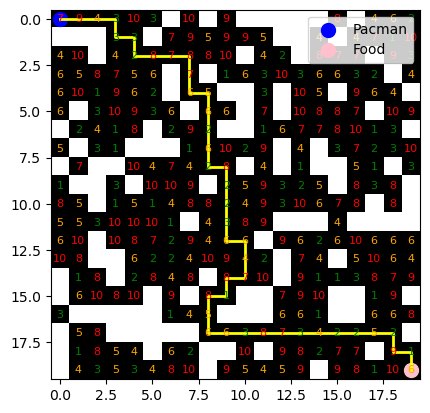

In [127]:
plot_algorithms_with_costs(maze, costs, start, goal,'A*',AStarWithCosts(maze,costs))

Question:

now that you have explored these methods(DFS, BFS,A star) in priced manner, Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations.